# Systematic Literature Review DX in Shipping - Thematic Analysis

Note: We can only do thematic analysis on title, since for the abstract we have inverted abstract and we are not capable of properly rebulding it

In [3]:
#!pip install spacy

In [4]:
#!python -m spacy download en_core_web_md

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from collections import Counter

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import DocBin

from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer

from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\anaconda3\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.i

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\anaconda3\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.i

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\anaconda3\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.i

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [31]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
# substring = 'title'
# # List all column names containing the substring using list comprehension
# matching_columns = [k for k in lit.columns if substring in k]
# print(matching_columns)
# #lit['title']

## Read the DB in

In [2]:
# Read in the file
#lit = pd.read_csv('C:/projects/dx_in_shipping/openalex_data_final.csv')
lit = pd.read_csv('./openalex_data.csv',low_memory=False)

In [3]:
# Keep only columns whose names contain the substring, modify in-place
lit = lit[['title']]
lit = lit.dropna(subset=["title"])

In [4]:
print(lit.count())

title    2290
dtype: int64


In [5]:
lit.head(5)

,title
0,Predictive Analysis of Maritime Congestion Usi...
1,VerifAI: Framework for Functional Verification...
2,Emerging trends in signal processing and machi...
3,Effectiveness of Problem-based Learning (PBL) ...
4,Enhancing Leafy Greens’ Production: Nutrient F...


## Thematic analysis

In [6]:
# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Preprocess a column (e.g., 'abstract' or 'title') in the dataset
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in STOP_WORDS]
    return " ".join(tokens)

NameError: name 'spacy' is not defined

In [ ]:
# Apply preprocessing to the relevant column (e.g., 'title' and 'abstract')
lit['cleaned_title'] = lit['title'].apply(preprocess_text)  # or 'title', depending on your focus

In [ ]:
# Load pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and get embeddings for each document
inputs = tokenizer(lit['cleaned_title'].tolist(), padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Averaging the token embeddings

In [ ]:
print(len(embeddings[0]))

In [ ]:
# Try different numbers of clusters

max_n_clusters = 50

from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, max_n_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, max_n_clusters), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

from sklearn.metrics import davies_bouldin_score
db_scores = []
for k in range(2, max_n_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    score = davies_bouldin_score(embeddings, labels)
    db_scores.append(score)

# Plot Davies-Bouldin scores
plt.plot(range(2, max_n_clusters), db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.show()

from sklearn.metrics import calinski_harabasz_score
# List to store Calinski-Harabasz scores for different numbers of clusters
ch_scores = []
# Define range for number of clusters
for k in range(2, max_n_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    score = calinski_harabasz_score(embeddings, labels)
    ch_scores.append(score)

# Plot Calinski-Harabasz scores
plt.plot(range(2, max_n_clusters), ch_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Numbers of Clusters')
plt.show()

# Calculate WCSS for each number of clusters in range
wcss = []
for k in range(2, max_n_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)  # WCSS for each cluster count

# Plot WCSS for each cluster count to visualize the elbow
plt.plot(range(2, max_n_clusters), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [20]:
# Detect Topics

# Apply KMeans clustering to the embeddings
kmeans = KMeans(n_clusters=8)
labels = kmeans.fit_predict(embeddings)

# Add the predicted topics to the dataframe
lit['topic'] = labels

# Get cluster centroids from the KMeans model
from sklearn.metrics import pairwise_distances
centroids = kmeans.cluster_centers_

# For each cluster, find the documents closest to the centroid
num_representatives = 10  # Number of representative documents per topic
for i in range(kmeans.n_clusters):
    # Get the indices of documents in the current cluster
    cluster_docs_idx = np.where(labels == i)[0]
    
    # Calculate distances to the centroid for documents in the cluster
    distances = pairwise_distances(embeddings[cluster_docs_idx], centroids[i].reshape(1, -1))
    
    # Sort documents by proximity to centroid and select top N closest
    closest_docs_idx = cluster_docs_idx[distances.flatten().argsort()[:num_representatives]]
    
    # Display the closest document titles for interpretation
    print(f"\nTopic {i + 1}:")
    for idx in closest_docs_idx:
        print(f"  - {lit['title'].iloc[idx]}")


Topic 1:
  - Multi-Scale Object Detection Model for Autonomous Ship Navigation in Maritime Environment
  - Deep Reinforcement Learning-Based UAV Data Collection and Offloading in NOMA-Enabled Marine IoT Systems
  - Resource and Trajectory Optimization for UAV-Relay-Assisted Secure Maritime MEC
  - A Comparative Study of Autonomous Object Detection Algorithms in the Maritime Environment Using a UAV Platform
  - Adaptive multi-source data fusion vessel trajectory prediction model for intelligent maritime traffic
  - Deep Learning-Assisted Triboelectric Smart Mats for Personnel Comprehensive Monitoring toward Maritime Safety
  - Explainable Anomaly Detection Framework for Maritime Main Engine Sensor Data
  - Link Quality Enhancement with Beamforming Using Kalman-based Motion Tracking for Maritime Communication
  - Multi-Task Learning-Enabled Automatic Vessel Draft Reading for Intelligent Maritime Surveillance
  - Sensors and AI Techniques for Situational Awareness in Autonomous Ships: A 

# I have then given the topic documents to GPT asking to summarize each topic in one description. This is the result:

Here’s a summary of each topic based on the provided titles:

---

### **Topic 1: Advancements in AI and Machine Learning for Maritime Applications**
This topic explores the integration of advanced AI techniques in the maritime sector, focusing on automation, situational awareness, and safety. Articles discuss multi-scale object detection models for autonomous ship navigation and the use of UAVs for data collection and surveillance. Research includes adaptive data fusion for vessel trajectory prediction and machine learning frameworks for maritime anomaly detection, such as sensor-based monitoring systems and beamforming for communication. The use of explainable AI frameworks for anomaly detection and multi-task learning for vessel draft reading emphasizes intelligent decision-making and safety in maritime operations.

---

### **Topic 2: Spatial and Environmental Analysis in Maritime and Inland Waters**
This topic focuses on the intersection of spatial data analysis, environmental monitoring, and maritime operations. Studies include remote sensing for water monitoring, spatial planning for offshore wind energy, and machine learning applications in greenhouse gas emission modeling. Research spans risk assessment for maritime transportation, air quality forecasting, and maritime accidents influenced by environmental factors like sea fog. The use of geographically weighted regression and big data for analyzing maritime transportation reflects a growing trend in environmental and geospatial analytics.

---

### **Topic 3: Predictive Modeling and Risk Assessment in Maritime Operations**
This topic delves into predictive models and analytics for enhancing safety and efficiency in maritime activities. Research highlights fuel consumption modeling, arrival time prediction, and the trust dynamics in supervising autonomous ships. Big data and machine learning approaches are employed for evaluating ship grounding risks, collision probability, and traffic safety. Several articles focus on in-depth traffic and economic analyses, emphasizing data-driven decision-making in maritime operations.

---

### **Topic 4: Data-Driven Optimization in Maritime Engineering and Traffic Management**
This topic addresses the use of data-driven and AI approaches in ship design, traffic prediction, and environmental forecasting. Articles discuss applications of machine learning, such as predicting wave heights, optimizing ship design under uncertainty, and evaluating traffic in multi-port systems. Risk assessment of sea lanes and carbon emission forecasting highlight the push toward sustainable and efficient maritime engineering solutions.

---

### **Topic 5: Blockchain and Edge Computing in Maritime Operations**
This topic investigates the application of blockchain and edge computing technologies in maritime logistics and communication. Research focuses on blockchain-enabled vulnerability detection, data integrity, and privacy-preserving data sharing. Articles highlight innovative use cases, such as smart contracts for shipping efficiency, decentralized anomaly detection systems, and reliable communication frameworks. These technologies aim to enhance maritime transport security, efficiency, and data transparency.

---

### **Topic 6: Innovations and Reviews in Autonomous and Smart Shipping**
This topic reviews the state of autonomous and smart shipping technologies, exploring their implications for design, safety, and logistics. Studies analyze machine learning in sustainable ship design, the current status of MASS (Maritime Autonomous Surface Ships) technologies, and digital twins for shipboard systems. Articles also examine functional suitability assessments of smart contracts and the bibliometric review of risk and reliability in autonomous systems. These discussions highlight the transformative potential of digitalization in maritime logistics.

---

### **Topic 7: Digital Transformation and Sustainability in Maritime Logistics**
This topic focuses on the digitalization of maritime operations and its impact on sustainability and efficiency. Articles explore blockchain’s role in digital transformation, automation's impact on gender parity, and renewable energy adoption in seaports. The use of deep learning for vessel trajectory prediction and intelligent supervision through network analysis underscores the push for smart maritime systems. The integration of data spaces and IoT technologies highlights innovative solutions for managing logistics and maritime operations sustainably.

---

### **Topic 8: Maritime Industry’s Adaptation to Digital and Sustainable Practices**
This topic explores the maritime industry's response to emerging technologies and sustainability challenges. Articles examine digital transformation strategies, blockchain adoption, and risk management performance in start-ups. Studies analyze sustainability reports and explore environmental risks through a 20-year analysis of maritime accidents. Research emphasizes co-creation in operations management, addressing sustainability goals through technological and organizational innovations.

--- 

Each topic highlights a specific area of innovation or challenge within the maritime sector, emphasizing the growing role of AI, big data, blockchain, and sustainability practices.

## Keyword analysis in abstract and title

In [46]:
# need to read lit again to keep abstract this time

# Read in the file
#lit = pd.read_csv('C:/projects/dx_in_shipping/openalex_data_final.csv')
lit = pd.read_csv('./openalex_data.csv',low_memory=False)

In [54]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
substring = 'abstract_inverted_index'
# List all column names containing the substring using list comprehension
matching_columns = [k for k in lit.columns if substring in k]
matching_columns.append('title')
#print(matching_columns)
#lit['title']

In [56]:
lit = lit[matching_columns]

In [60]:
# prepare a function to extract keyword from column name

def extract_keyword(row, colnames):
    words = []
    for c in colnames:
        if pd.notnull(row[c]):
            csplit = c.split('_')
            if len(csplit) > 3:
                words.append(csplit[3])
    return ' '.join(words)

In [61]:
lit['full_abstract_words'] = lit.apply(lambda row: extract_keyword(row,matching_columns), axis=1)

In [62]:
lit = lit[['title', 'full_abstract_words']]

In [63]:
lit.loc[:, 'full_text'] = lit.apply(lambda row: f"{row['title']} {row['full_abstract_words']}", axis=1)

In [64]:
lit = lit [['full_text']]

In [65]:
# clean full_text

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to clean and preprocess text
def preprocess_text(text):
    doc = nlp(text)  # Process text with spaCy
    clean_words = [
        token.lemma_.lower() for token in doc  # Lemmatize and lowercase
        if not token.is_stop  # Remove stopwords
        and not token.is_punct  # Remove punctuation
    ]
    return ' '.join(clean_words)

# Apply the cleaning function to both columns
lit.loc[:, 'cleaned_text'] = lit['full_text'].apply(preprocess_text)

In [66]:
lit['cleaned_text']

0       predictive analysis maritime congestion dynami...
1       verifai framework functional verification ai b...
2       emerge trend signal processing machine learnin...
3       effectiveness problem base learning pbl mariti...
4       enhance leafy greens production nutrient film ...
                              ...                        
2321    novel bias tsp algorithm maritime patrol marit...
2322    ship collision avoidance base vulnerability as...
2323    pmbm filtering fusion target provide exterocep...
2324    research thrust allocation power positioning s...
2325    scan issue maritime maritime global ship impro...
Name: cleaned_text, Length: 2326, dtype: object

In [67]:
# We now perform key extraction in different ways

# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer to extract keywords
vectorizer = TfidfVectorizer(max_df=0.8, min_df = 2, stop_words='english', max_features=1000)  # Adjust max_df and max_features as needed
tfidf_matrix = vectorizer.fit_transform(lit['cleaned_text'])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Show top N keywords per document based on TF-IDF score
top_n = 10  # Adjust the number of keywords you want
top_keywords = []

# For each document, get the top N keywords based on TF-IDF scores
for row in tfidf_matrix:
    # Zip the TF-IDF scores with feature names, and filter only terms with scores > 0 for the document
    sorted_items = sorted([(score, feature) for score, feature in zip(row.toarray().flatten(), tfidf_feature_names) if score > 0], reverse=True)
    keywords = [item[1] for item in sorted_items[:top_n]]
    top_keywords.append(keywords)

# Add keywords as a new column in the dataframe
lit['top_keywords'] = top_keywords
lit.head(5)

,full_text,cleaned_text,top_keywords
0,Predictive Analysis of Maritime Congestion Usi...,predictive analysis maritime congestion dynami...,"[prediction, analysis, feature, traffic, dynam..."
1,VerifAI: Framework for Functional Verification...,verifai framework functional verification ai b...,"[functional, ai, systems, domain, framework, b..."
2,Emerging trends in signal processing and machi...,emerge trend signal processing machine learnin...,"[special, signal, trend, processing, emerge, n..."
3,Effectiveness of Problem-based Learning (PBL) ...,effectiveness problem base learning pbl mariti...,"[learning, effectiveness, problem, base, marit..."
4,Enhancing Leafy Greens’ Production: Nutrient F...,enhance leafy greens production nutrient film ...,"[urban, production, food, container, automatio..."


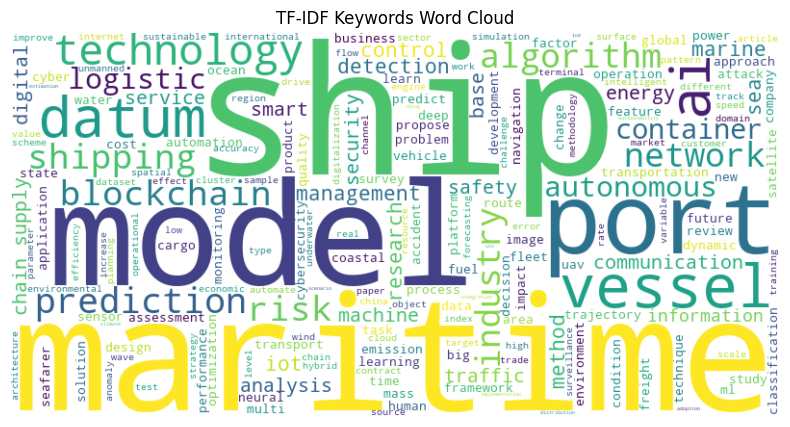

{'meet', 'important', 'total', 'temperature', 'sequence', 'seaport', 'world', 'influence', 'global', 'fast', 'finding', 'accurately', 'experience', 'share', 'insight', 'cooperation', 'shift', 'empirical', 'signal', 'concept', 'process', 'exhibit', 'grow', 'short', 'planning', 'air', 'investment', 'power', 'identify', 'freight', '19', 'primary', 'manager', 'city', 'response', 'deployment', 'decision', 'filter', 'relation', 'profile', 'systems', 'environmental', 'country', 'cyber', 'idea', 'forecast', 'quality', 'support', 'extract', 'ensure', 'recently', 'math', 'consumption', 'direction', 'propagation', 'automatic', 'explore', 'deal', 'datum', 'natural', 'volume', 'drive', 'contribution', 'digitalization', 'experimental', 'human', 'architecture', 'efficiency', 'robotic', 'strategy', 'close', 'journal', 'characterize', 'start', 'possible', 'neural', 'trade', 'limit', 'economy', 'good', 'channel', 'conduct', 'procedure', 'alternative', 'zone', 'solve', 'standard', 'importance', 'novel', 

In [68]:
from wordcloud import WordCloud

# Combine all keywords into a single list for each method (TF-IDF and BERT)
tfidf_keywords = [word for keywords in lit['top_keywords'] for word in keywords]

# Convert lists to a single string for word cloud generation
tfidf_keywords_text = " ".join(tfidf_keywords)

# Generate and plot the TF-IDF Word Cloud
wordcloud_tfidf = WordCloud(width=800, height=400, background_color="white").generate(tfidf_keywords_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Keywords Word Cloud")
plt.show()

# let's also get the unique keywords so we can check which to exclude for the next step
kw_set = set(tfidf_keywords)
print(kw_set)

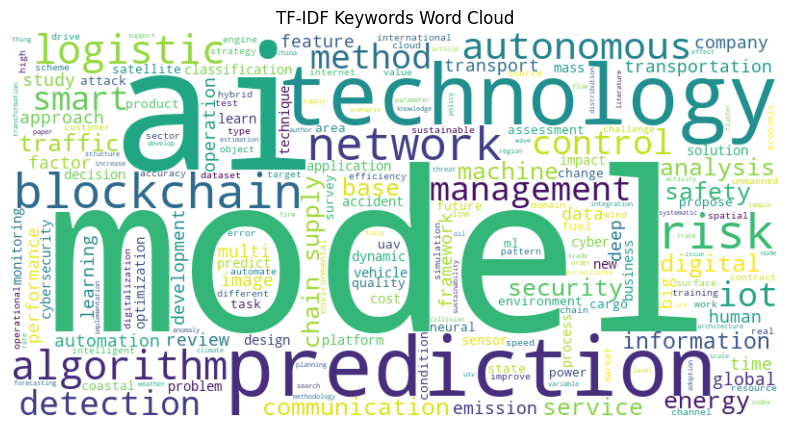

In [69]:
# Cloud of words removing strong ship-related words

# the following words have been detected from gpt 4
remove_words = [
'port',
'underwater',
'trajectory',
'hull',
'seafarer',
'navigation',
'terminal',
'vessel',
'waterway',
'marine',
'shipping',
'shoreline',
'offshore',
'route',
'onboard',
'usv (unmanned surface vehicle)',
'seaport',
'buoy',
'maritime',
'ship',
'mml (Maritime Mobile Service Identity)',
'ocean',
'fleet',
'inland',
'buoy',
'datum',
'container',
 'industry', 'marina', 'sea', 'research', 'water', 'freight'
]
#remove_words = ['maritime', 'ship', 'vessel', 'port', 'datum', 'container', 'shipping', 'industry', 'marina', 'sea', 'research', 'water', 'freight']

# Combine all keywords into a single list for each method (TF-IDF and BERT)
tfidf_keywords = [word for keywords in lit['top_keywords'] for word in keywords if word not in remove_words]

# Convert lists to a single string for word cloud generation
tfidf_keywords_text = " ".join(tfidf_keywords)

# Generate and plot the TF-IDF Word Cloud
wordcloud_tfidf = WordCloud(width=800, height=400, background_color="white").generate(tfidf_keywords_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Keywords Word Cloud")
plt.show()